# Big Data Mart Sales Problem

### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:
    
- bigdatamart_Train.csv: Use this file for the model building purpose.
    
- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 


In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset of training data
training_dataset =pd.read_csv("bigdatamart_Train.csv")

In [3]:
training_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In the above the rows of the training dataset are shown. The feature columns that help in predicting the sales which is the target label "Item_Outlet_Sales" column. Since sales is a continous value it makes this to be a Regression analysis

In [4]:
# loading dataset of testing data
testing_dataset_original =pd.read_csv("bigdatamart_Test.csv")

In [5]:
testing_dataset_original

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


The above shows the rows of data present in the testing dataset. Unlike the training dataset we do not have the target label present here and therefore consists only of the feature columns where the target label which is "Item_Outlet_Sales" is to be predicted.

# Exploratory Data Analysis (EDA)

In [6]:
training_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
training_dataset.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6689,DRC25,5.73,Low Fat,0.045557,Soft Drinks,85.3882,OUT018,2009,Medium,Tier 3,Supermarket Type2,1288.3230
3044,FDR26,20.70,Low Fat,0.071700,Dairy,177.6028,OUT010,1998,NaN,Tier 3,Grocery Store,531.3084
5705,FDP11,NaN,Low Fat,0.120986,Breads,216.1166,OUT019,1985,Small,Tier 1,Grocery Store,435.4332


In [8]:
training_dataset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [9]:
training_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
The list of all the column names and a short description about it.

-Item_Identifier: Unique Product ID
-Item_Weight: Weight of product in grams
-Item_Fat_Content: Whether the product is low fat or not
-Item_Visibility: The percentage of total display area of all products in a store allocated to that particular product
-Item_Type: The category in which the product belongs
-Item_MRP: Maximum Retail Price (list price) of the product
-Outlet_Identifier: Unique Store ID
-Outlet_Establishment_Year: The year in which store was established
-Outlet_Size: The size of the store in terms of ground area coverage    
-Outlet_Location_Type: The type of city in which the store is located   
-Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
-Item_Outlet_Sales: Sales of the product in the particulat store. This is the Outcome/Target data to be predicted.

In [10]:
training_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

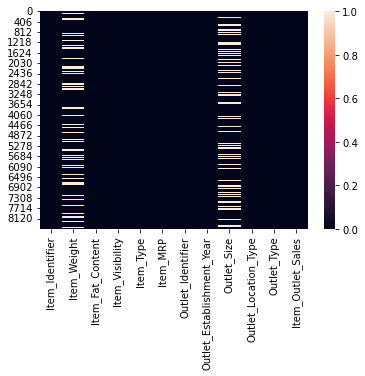

In [11]:
sns.heatmap(training_dataset.isnull())

The columns "Item_Weight" and "Outlet_Size" have missing values that needs to be filled.

In [12]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


With the usage of info method we can take a look at all the columns irrespective of them being numerical or categorical columns. Here we notice that columns Item_Weight and Outlet_Size have missing values.

The above cell shows that our data set consists of 4 columns with float datatype, 1 column with integer datatype and 7 columns with object datatype.

## Statistical Summary

In [13]:
training_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Using the describe method we can take a look at all the numerical data information since all the object data type gets ignored. 

Here the first column Item_Weight reflects on missing data when compared with the other column counts.

Also a gap between the 75% and maximum value for Item_MRP indicating some outlier product with a high price.

In [14]:
training_dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

checking for the list of all unique data or rows present in the columns

In [15]:
obj_columns = []
for x in training_dataset.dtypes.index:
    if training_dataset.dtypes[x] == 'object':
        obj_columns.append(x)
        

obj_columns.remove('Item_Identifier')
obj_columns.remove('Outlet_Identifier')

obj_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

listed down all the columns that have object data type and removed the columns "Item_Identifier" and "Outlet_Identifier" since they just have the ID details and have no categorical information to offer.

In [16]:
for col in obj_columns:
    print(col)
    print(training_dataset[col].value_counts())
    print("="*40)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Now I have chosen to display all the categorical columns and the values that are present in them as a collective value and the number of rows that are covered by them.

In the column "Item_Fat_Content" we can club the types Low fat, LF, low fat into one single entity as they all represent the low fat information in the products. Similarly Regular and reg can be clubbed into one single entity that would display regular/fat details.

The "Item_Type" shows the types of food present.

The "Outlet_Size" has 3 categories medium size area, small size area and high/large size area. While the "Outlet_Location_Type" also has 3 categories tier 3, tier 2 and tier 1 showcasing whether it's built in a pricey location or not. 

Finally the "Outlet_Type" shows 4 categories namely Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store.

# Filling missing values present in our training dataset.

In [17]:
item_weight_mean = training_dataset.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


We will need to fill the missing values present in "Item_Weight" column, the first thing I want to perform is check the mean of each product type rather than taking a mean of the products as a whole. I am doing this becuase each product category is different from other and therefore weighs differently too.

So instead of generalizing food, drink, electronics, household items etc weight into one column and taking their mean weight I am bifurcating each product category and then checking for the mean in those to replace the missing weights that fall in the same category.

In [18]:
missing_data = training_dataset['Item_Weight'].isnull()

for i, item in enumerate(training_dataset['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            training_dataset['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            training_dataset['Item_Weight'][i] = np.mean(training_dataset['Item_Weight'])

First we are checking the missing data pesent in the "Item_Weight" column that will give out the location of null values that need to be treated and filled with the respective mean values.

Then the for loop helps us in filing the missing data using the if condition where the product category matches the previous data then it takes the mean of only those categorical items and replaces them. In the else part we have collected all the remaining data which do not get covered in our if condition and simply replacing it with the overal mean since there is no specific bifurcation present for it.

In [19]:
training_dataset['Item_Weight'].isnull().sum()

0

We have successfully filled all the missing rows present previouly in the "Item_Weight" column so 1 out of the 2 columns have been treated.

In [20]:
outlet_size_mode = training_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


As mentioned earlier Outlet_Type and Outlet_Size determine the outlet interior therefore we will fill the Outlet_Size missing information by using the mode option that will also extract it's insights on how to repalce the null value keeping Outlet_Type as it's criteria.

In [21]:
missing_val = training_dataset['Outlet_Size'].isnull()
training_dataset.loc[missing_val, 'Outlet_Size'] = training_dataset.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

Here I have identified the missing values present in "Outlet_Size" column and then replaced it with the mode value which was previously analyzed using the "Outlet_Type" column to bifurcate the data and add the correct or appropriate option.

In [22]:
training_dataset['Outlet_Size'].isnull().sum()

0

Now we have successfully filled the 2nd missing data column as well using the mode option as this was a categorical column.

In [23]:
sum(training_dataset['Item_Visibility']==0)

526

After looking at the "Item_Visibility" column I saw that there are no null values in it but there are 526 rows with 0 as it's data that again does not make any sense therefore I will try replacing those values with the mean value of that column.

In [24]:
training_dataset.loc[:, 'Item_Visibility'].replace([0], [training_dataset['Item_Visibility'].mean()], inplace=True)

In the "Item_Visibility" visibility column I am only replacing all the 0 values with the mean value of it's entire column. The parameter inplace helps us in making the changes to the column directly instead of having to use the re assignment feature.

In [25]:
sum(training_dataset['Item_Visibility']==0)

0

We can confirm that there are no 0 values present in the "Item_Visibility" column even though the mean data has risen atleast it is better than having 0 as the information.

In [26]:
training_dataset['Item_Fat_Content'] = training_dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
training_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Since the "Item_Fat_Content" column had similar categories and was better to club those data we have used the dictionary option and replaced the LF and low fat option to Low Fat while the reg has been clubbed with Regular option making only 2 options than the previous 5 categories.

## Adding more columns/categories from the existing one's

In [27]:
training_dataset['New_Item_Type'] = training_dataset['Item_Identifier'].apply(lambda x: x[:2])
training_dataset['New_Item_Type'] = training_dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
training_dataset['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In "Item_Identifier" column we had prefixes such as FD, DR and NC that indicated towards the type of product that was being sold. Hence we created a new column that that had these categories tagged as Food, Drinks and Non Consumable to make the model understand better the types they fall in.

In [28]:
training_dataset.loc[training_dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
training_dataset['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Similarly with the usage of Non Consumable category for the newly created column we are adding an extra category to our exisiting column "Item_Fat_Content" which is tagged as Non Edible.

In [29]:
training_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

In [30]:
training_dataset['Outlet_Years'] = 2013 - training_dataset['Outlet_Establishment_Year']
training_dataset['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

To reduce the only integer column present in our dataset to a lesser value that would not make our model biased eventually we are reducing the year of establishment after comparing it with the year of data collection that is 2013.

In [31]:
training_dataset = training_dataset.drop("Outlet_Establishment_Year", axis=1)
training_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


As we have created the new "Outlet_Years" column that contains the information of how many years it has been for the outlet being built till the year of data collection we are dropping the original "Outlet_Establishment_Year" column.

In [32]:
training_dataset.skew()

Item_Weight          0.090561
Item_Visibility      1.286877
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
Outlet_Years         0.396641
dtype: float64

I am taking a look at the skewness information for all the numerical datatype columns and I can see that columns "Item_Visibility" and "Item_Outlet_Sales" are out of the acceptable skewness range of +/-0.5. Since "Item_Outlet_Sales" is our target column we can ignore it completely but for the other column "Item_Visibility" I will retain the entire information even though it is indicating towards the presence of outliers in it's skewed data.

If required I will treat the outliers to improve my model accuracy else I will continue to include all the data without losing any information.

# dropping columns

In [33]:
training_dataset = training_dataset.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

Removing the columns Item_Identifier and Outlet_Identifier as they were just providing the ID information and it doesnt contribute anything to the machine learning.

# Data Visualization

## Pair Plot

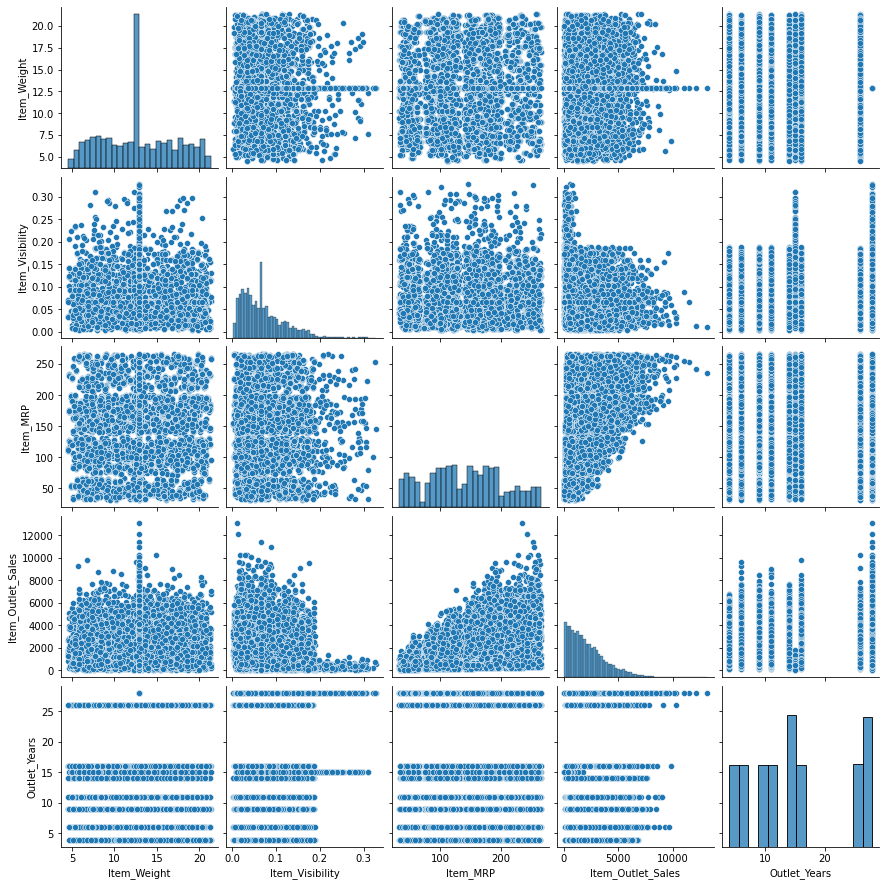

In [34]:
sns.pairplot(training_dataset)

The above pairplot considers only numerical data therefore all the object datatype columns have been skipped from the representation. Also the column "Outlet_Years" can be ignored since it only provides the number of year when the outlet was built. Checking through the scatterplots we see lots of data point convergence towards the centre due to the replacement of values using the mean option.

## Count Plots

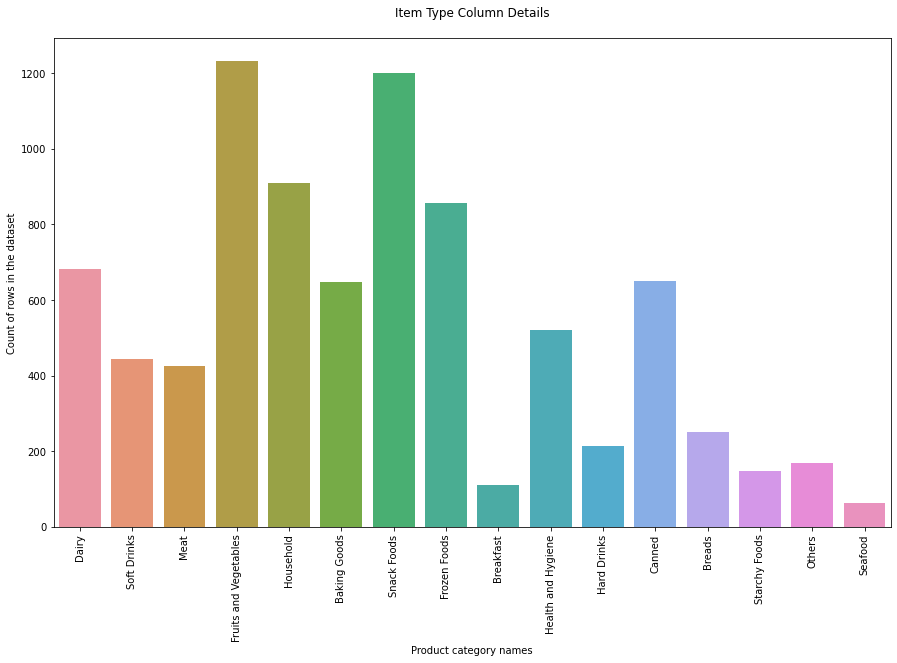

In [35]:
plt.figure(figsize=(15,9))
values = list(training_dataset['Item_Type'].unique())
diag = sns.countplot(training_dataset["Item_Type"])
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Item Type Column Details\n")
plt.xlabel("Product category names")
plt.ylabel("Count of rows in the dataset")
plt.show()

In the above count plot we see all the categorical product names present in the Item_Type column and it's value counts present in the dataset given us an insight on how Fruits/Vegetables and Snack foods are the highest number of product present in the outlet since they get sold at a larger number it needs to be stocked up accordingly.

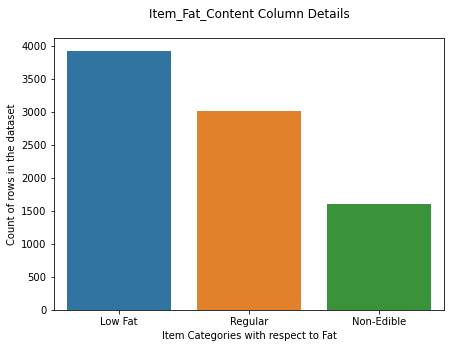

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Item_Fat_Content"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Item Categories with respect to Fat")
plt.title("Item_Fat_Content Column Details\n")
plt.show()

The fat content details present in the products are being depicted using the visual representation wherein the numbers of low fat is higher than the regular product and non edible items will obviously have nothing to do with it's fat content so it is on a lower scale.

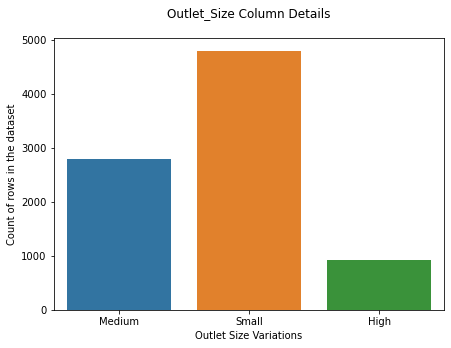

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Outlet_Size"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Size Variations")
plt.title("Outlet_Size Column Details\n")
plt.show()

The above count plot gives us a visual representation on the Outlet Size data where small size outlets are higher when compared to the others and large size outlets are very less in numbers.

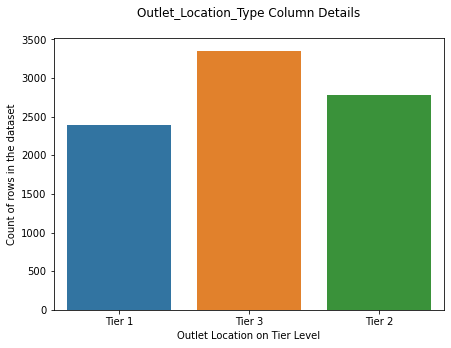

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Outlet_Location_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Location on Tier Level")
plt.title("Outlet_Location_Type Column Details\n")
plt.show()

The count plot made for Outlet Location shows us the different tier types and looks like Tier 3 has the highest value then comes Tier 2 and finally Tier 1 being the most expensive style to be built upon depending upon the location, area size and expense to make it.

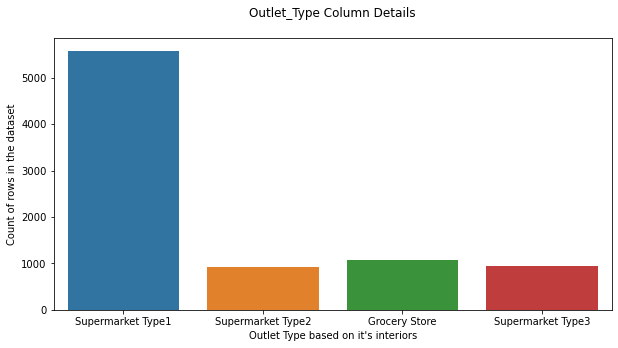

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(training_dataset["Outlet_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Type based on it's interiors")
plt.title("Outlet_Type Column Details\n")
plt.show()

Finally the count plot made for Outlet Type reveals the different category of outlet ranging from Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store. The plot shows that Supermarket Type1 is the highest and possibly the most used architecture type for Big Data Mart retail store.

# Correlation check:

In [41]:
training_dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,0.011550,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.134138,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.134138,0.567574,1.000000,0.049135
Outlet_Years,0.008301,0.078355,-0.005020,0.049135,1.000000


<AxesSubplot:>

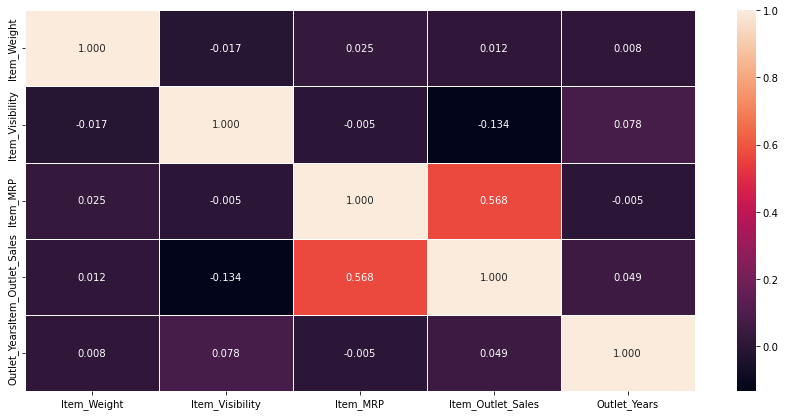

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(training_dataset.corr(), annot=True, linewidths=0.5, fmt='.3f')

In [43]:
training_dataset.corr().Item_Outlet_Sales.sort_values()

Item_Visibility     -0.134138
Item_Weight          0.011550
Outlet_Years         0.049135
Item_MRP             0.567574
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

With the help of a correlation heatmap we can see that the Sales column has a high relation with MRP which makes sense because the price of a product ultimately derives the sale inside a retail store. I see that all the other numeric columns are very less impactful when it comes to a positive or negative correlation with the Sales data.

# Checking Outliers

In [44]:
training_dataset.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Years'],
      dtype='object')

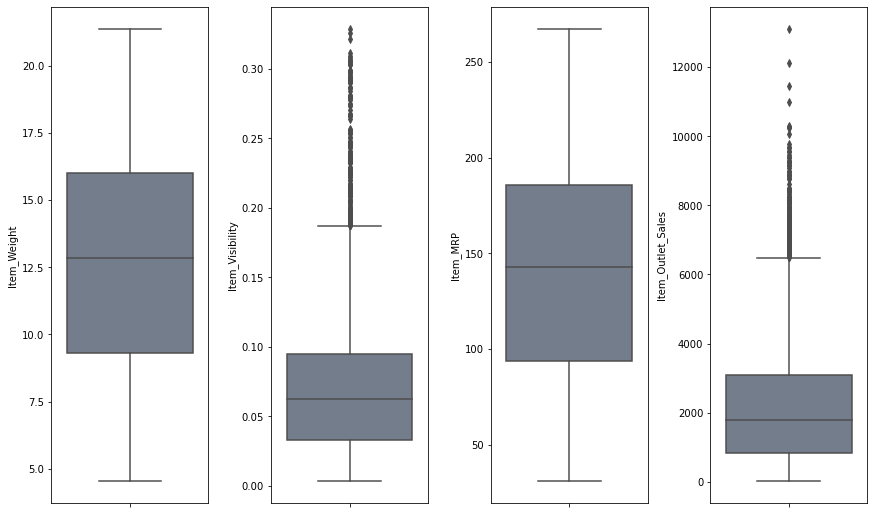

In [45]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in training_dataset[numeric_column_names].items():
    sns.boxplot(y=col, data=training_dataset, ax=ax[index], palette="bone")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

The box plot representation shows us that there are outliers present in 2 columns but since they are like continous data points I believe our model should not face any issue due to it.

# Skewness Checking

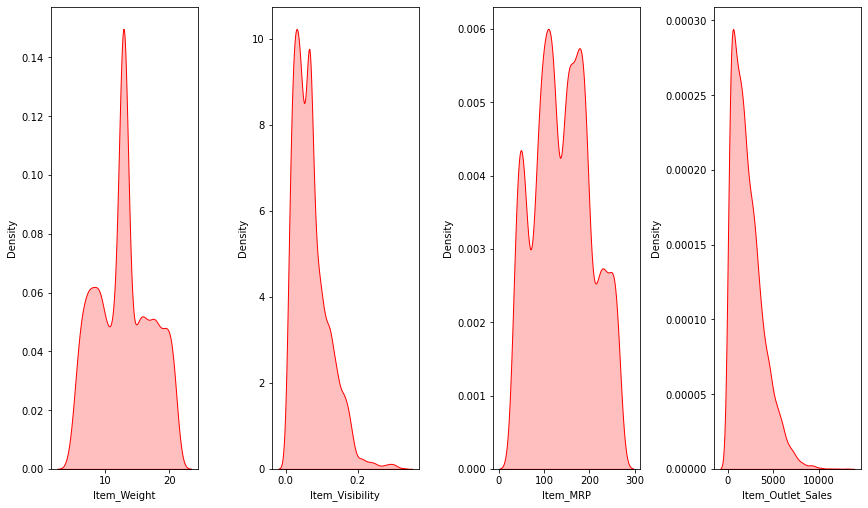

In [46]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in training_dataset[numeric_column_names].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

I see that the distribution plot created for the numeric data columns show the normal distribution format for all of them. The right skewness present in "Item_Visibility" is due to the continous outlier data points that I wish to retain instead of removing it and treating the bell shape curve format retention.

# Data Preprocessing

## Transformation on the Target column

In [47]:
# log transformation on "Item_Outlet_Sales" column

training_dataset['Item_Outlet_Sales'] = np.log(1+training_dataset['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

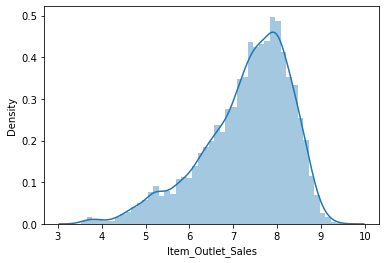

In [48]:
sns.distplot(training_dataset['Item_Outlet_Sales'])

## Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
training_dataset['Item_Type']=le.fit_transform(training_dataset['Item_Type'])

In [51]:
training_dataset['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

I am using label encoding only on "Item_Type" as it had lots of categories and if I used one hot encoding on it then the number of columns would have increased a lot.

In [52]:
training_dataset = pd.get_dummies(training_dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
training_dataset

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,8.225808,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,6.096776,4,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,7.648868,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,6.597664,15,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,6.903451,26,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,7.929984,26,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,6.310436,11,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,7.085159,9,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,7.521100,4,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


I am using the pandas get_dummies feature which uses One Hot Encoding in the background to convert all the categorical values into numeric data increasing the number of columns as well.

# correlation with additional columns

In [53]:
training_dataset.corr()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
Item_Weight,1.000000e+00,-0.017450,0.028015,0.024756,0.008059,0.008301,-0.016422,0.046858,-0.021157,0.012313,...,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,2.542763e-14,-0.050492,-0.007953,0.046858
Item_Visibility,-1.745026e-02,1.000000,-0.036000,-0.005259,-0.202466,0.078355,0.007010,-0.070039,0.049915,-0.043639,...,0.063744,-0.073794,0.012254,0.299436,-0.153434,-0.032753,-5.297190e-02,-0.010900,0.067875,-0.070039
Item_Type,2.801496e-02,-0.036000,1.000000,0.032651,0.019914,-0.004970,-0.014716,0.189438,-0.139434,-0.003507,...,-0.006536,0.007172,-0.000878,-0.003389,0.001219,-0.000659,2.412673e-03,0.240378,-0.320288,0.189438
Item_MRP,2.475610e-02,-0.005259,0.032651,1.000000,0.509886,-0.005020,-0.009619,0.004859,0.006063,0.002438,...,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-6.713699e-03,-0.051733,0.029315,0.004859
Item_Outlet_Sales,8.058561e-03,-0.202466,0.019914,0.509886,1.000000,-0.077032,-0.008051,-0.004793,0.012314,0.061477,...,-0.131708,0.149934,-0.022879,-0.656447,0.286541,0.011792,2.517687e-01,-0.031238,0.024411,-0.004793
Outlet_Years,8.300836e-03,0.078355,-0.004970,-0.005020,-0.077032,1.000000,-0.000415,0.004385,-0.003151,0.453388,...,0.201690,-0.540820,0.333895,0.281196,-0.245070,-0.466336,5.380723e-01,-0.009441,0.002312,0.004385
Item_Fat_Content_Low Fat,-1.642178e-02,0.007010,-0.014716,-0.009619,-0.008051,-0.000415,1.000000,-0.443265,-0.680864,-0.001839,...,-0.000921,0.007400,-0.006259,-0.004137,0.003103,-0.001209,8.911961e-04,0.291339,0.195997,-0.443265
Item_Fat_Content_Non-Edible,4.685780e-02,-0.070039,0.189438,0.004859,-0.004793,0.004385,-0.443265,1.000000,-0.354722,0.004957,...,-0.002685,-0.005443,0.007695,0.008860,-0.004614,-0.001063,-1.361078e-03,-0.154560,-0.768023,1.000000
Item_Fat_Content_Regular,-2.115731e-02,0.049915,-0.139434,0.006063,0.012314,-0.003151,-0.680864,-0.354722,1.000000,-0.002132,...,0.003155,-0.003272,0.000241,-0.002924,0.000533,0.002129,1.825365e-04,-0.177593,0.423092,-0.354722
Outlet_Size_High,1.231336e-02,-0.043639,-0.003507,0.002438,0.061477,0.453388,-0.001839,0.004957,-0.002132,1.000000,...,-0.218609,-0.244113,0.435419,-0.133686,0.254668,-0.122481,-1.229987e-01,-0.000479,-0.003993,0.004957


<AxesSubplot:>

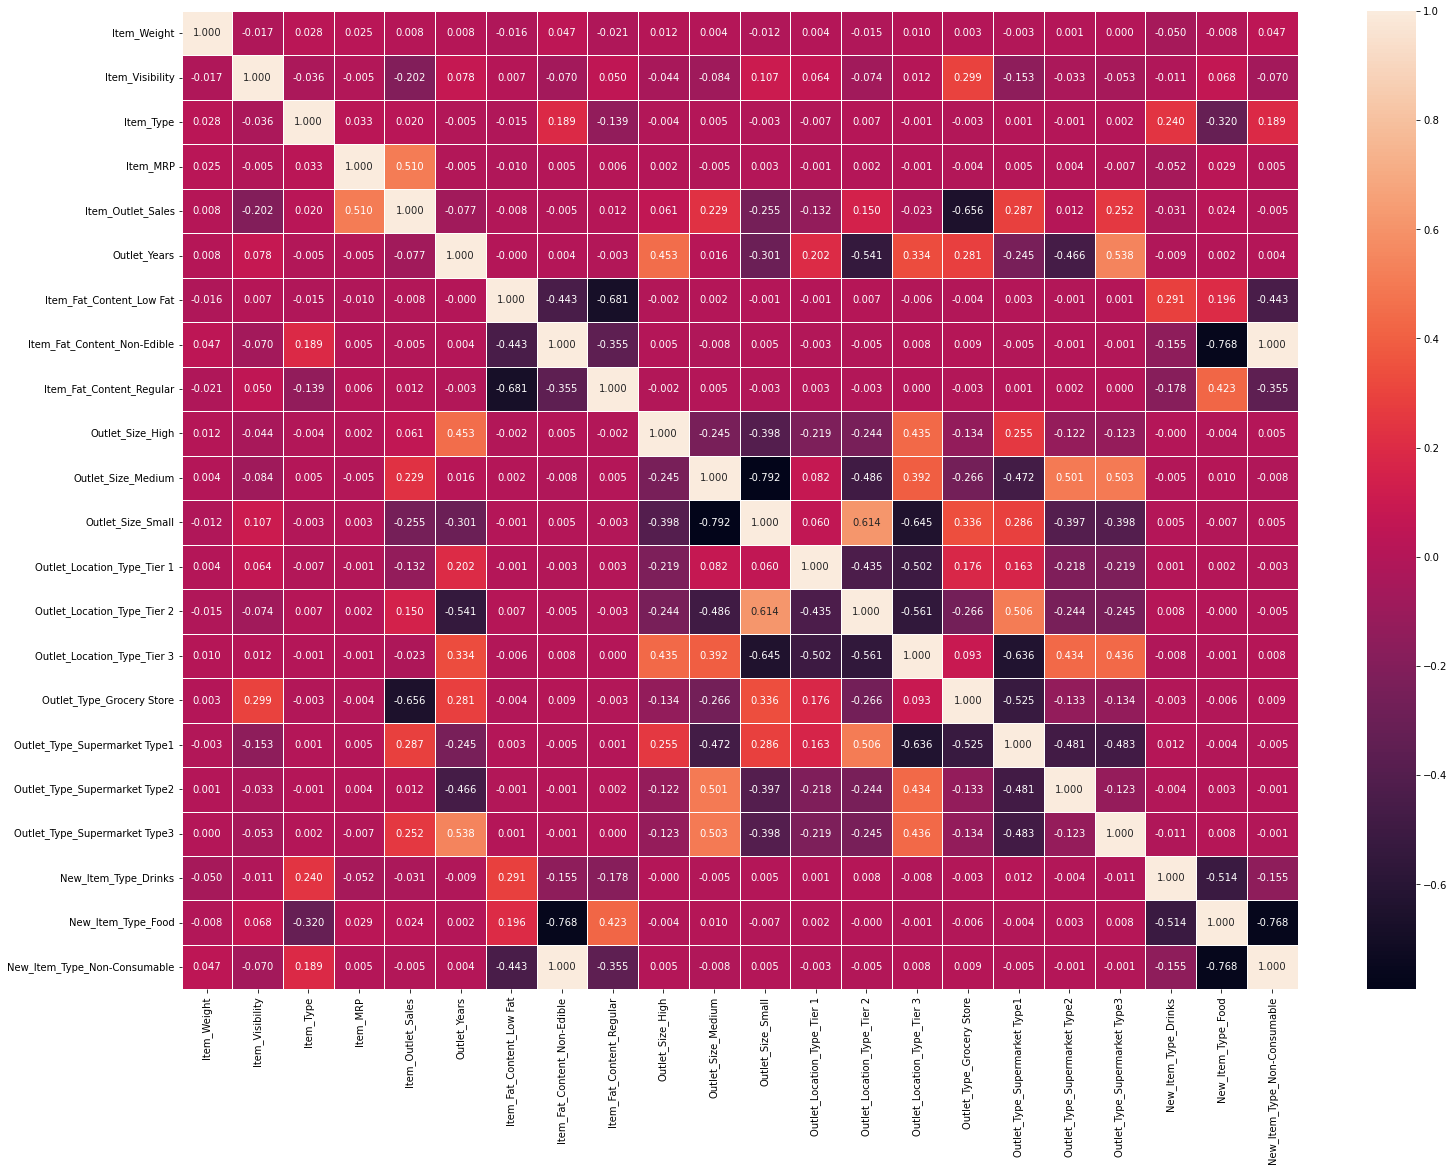

In [54]:
plt.figure(figsize=(25,18))
sns.heatmap(training_dataset.corr(), annot=True, linewidths=0.5, fmt='.3f')

# Splitting the dataset into Features and Target

In [55]:
x = training_dataset.drop('Item_Outlet_Sales', axis=1)
y = training_dataset['Item_Outlet_Sales']

In [56]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,4,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,15,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,26,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,26,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,11,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,9,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [57]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

I have separated the dataset into features and labels where x represents all the feature columns and y represents the target label column.

## Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x # Displaying all the features after applying scaling technique to avoid bias output

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,-0.841872,-1.111358,-0.766479,1.747454,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.641706,-1.045067,1.608963,-1.489023,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.098554,-1.096733,0.658786,0.010040,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.500838,-0.083740,-0.291391,0.660050,-0.020085,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.929428,-0.083740,0.421242,-1.399220,1.293934,-0.922396,2.080915,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.371418,1.180783,1.293934,1.084133,-0.480558,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8519,-1.059578,-0.476643,-1.716656,-0.527301,-0.497909,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8520,-0.534243,-0.718672,0.183698,-0.897208,-0.736822,-0.922396,2.080915,-0.738147,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
8521,-1.336444,1.538968,1.371418,-0.607977,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558


I am using the Standard Scaler method to normalize my feature values and ensure that my model does not have any kind of bias towards a particular column value.

# Machine Learning

Since the y (Target) has continuous values we will use Linear Regression model

## Finding Best Random State

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [61]:
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.7181057867158107
At random state 1, the testing accuracy is :  0.7264907700896143


At random state 2, the training accuracy is : 0.7223525804781308
At random state 2, the testing accuracy is :  0.7103688010409104


At random state 3, the training accuracy is : 0.711025697715085
At random state 3, the testing accuracy is :  0.7528040086164005


At random state 4, the training accuracy is : 0.7187180536519386
At random state 4, the testing accuracy is :  0.7253157933694054


At random state 5, the training accuracy is : 0.7224684505202925
At random state 5, the testing accuracy is :  0.7103474539092975


At random state 6, the training accuracy is : 0.7236098278065801
At random state 6, the testing accuracy is :  0.7057934357638371


At random state 7, the training accuracy is : 0.7229269531907755
At random state 7, the testing accuracy is :  0.7088639217951844


At random state 8, the training accuracy is : 0.7162665508190464
At random st

At random state 76, the testing accuracy is :  0.7373269103845226


At random state 77, the training accuracy is : 0.7241253945572889
At random state 77, the testing accuracy is :  0.7034389640457477


At random state 78, the training accuracy is : 0.7223690220308686
At random state 78, the testing accuracy is :  0.7103633844134436


At random state 79, the training accuracy is : 0.7190022835982033
At random state 79, the testing accuracy is :  0.7224635532500046


At random state 80, the training accuracy is : 0.7168945098062895
At random state 80, the testing accuracy is :  0.7335011307333446


At random state 81, the training accuracy is : 0.7197144711793936
At random state 81, the testing accuracy is :  0.7217927079026314


At random state 82, the training accuracy is : 0.7213162905809396
At random state 82, the testing accuracy is :  0.7155672788474575


At random state 83, the training accuracy is : 0.7250030631502793
At random state 83, the testing accuracy is :  0.6993778130805

Hence we chose random state 97 since both training and testing accuracy is close by and higher in value compared to others

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=97)

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
pred_test = lr.predict(x_test)

In [65]:
print(r2_score(y_test,pred_test))

0.7197531625139901


We will draw the linear regression plot to see the best fit line

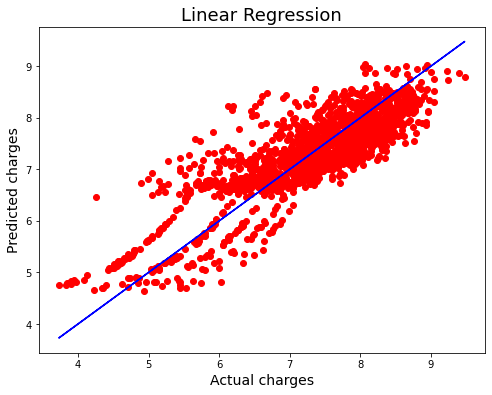

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line seems to be covering some of the points

In [67]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=97)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

### Linear Regression

In [69]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 0.5357222342145881
R2 Score is: 71.97531625139901
Cross Validation Score is: 71.8707705479344
R2 Score - Cross Validation Score is 0.10454570346460912


### L1 -- Lasso Regression

In [70]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 0.5363727042880203
R2 Score is: 71.90722019779696
Cross Validation Score is: 71.87078094515246
R2 Score - Cross Validation Score is 0.036439252644498765


### L2 -- Ridge Regression

In [71]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 0.5363768940162069
R2 Score is: 71.90678131800261
Cross Validation Score is: 71.87113536710406
R2 Score - Cross Validation Score is 0.035645950898555157


### Elastic Net

In [72]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 0.5363708133482427
R2 Score is: 71.90741827521862
Cross Validation Score is: 71.8711193561046
R2 Score - Cross Validation Score is 0.03629891911401728


### Support Vector Regression

In [73]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.5321040792342759
R2 Score is: 72.35258354946747
Cross Validation Score is: 72.33694966484376
R2 Score - Cross Validation Score is 0.015633884623710514


In [74]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 0.5531908677289212
R2 Score is: 70.11788163736144
Cross Validation Score is: 70.53986110800587
R2 Score - Cross Validation Score is -0.4219794706444304


In [75]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 0.5425042690651335
R2 Score is: 71.26126169039597
Cross Validation Score is: 71.43261128594615
R2 Score - Cross Validation Score is -0.1713495955501827


### Decision Tree Regressor

In [76]:
model=DecisionTreeRegressor(random_state=97)
regressor(model, x, y)

Root Mean Square Error is: 0.7609426870496488
R2 Score is: 43.45876726182665
Cross Validation Score is: 43.64381197246055
R2 Score - Cross Validation Score is -0.18504471063389616


### Random Forest Regressor

In [77]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.5551193610821299
R2 Score is: 69.90917278719932
Cross Validation Score is: 69.80871268454904
R2 Score - Cross Validation Score is 0.10046010265028826


### K Neighbors Regressor

In [78]:
model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
regressor(model, x, y)

Root Mean Square Error is: 0.6537722546576333
R2 Score is: 58.263661217496136
Cross Validation Score is: 58.18402883704099
R2 Score - Cross Validation Score is 0.07963238045514487


### SGD Regressor

In [79]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.5382190288014223
R2 Score is: 71.7134830469381
Cross Validation Score is: 71.58664330413906
R2 Score - Cross Validation Score is 0.1268397427990351


### Gradient Boosting Regressor

In [80]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.5207544934818933
R2 Score is: 73.51942386443724
Cross Validation Score is: 73.51000323707721
R2 Score - Cross Validation Score is 0.009420627360029243


### Ada Boost Regressor

In [81]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=97)
regressor(model, x, y)

Root Mean Square Error is: 0.5802312866362291
R2 Score is: 67.1251588512666
Cross Validation Score is: 67.24659211597378
R2 Score - Cross Validation Score is -0.12143326470717852


### Extra Trees Regressor

In [82]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 0.5667802994885662
R2 Score is: 68.63170812402785
Cross Validation Score is: 69.02253715191556
R2 Score - Cross Validation Score is -0.3908290278877047


Comparing all the above the Gradient Boosting Regressor gives the best results since the R2 Score - Cross Validation Score are closest and the highest amoung all the models.

# Hyper Parameter Tuning

In [83]:
# creating parameters list to pass into GridSearchCV

parameters = {'loss' : ['squared_error', 'absolute_error', 'quantile'],
              'learning_rate': [0.1, 1.05],
              'criterion': ['friedman_mse', 'squared_error', 'mse'],
              'max_depth' : [3 , 4 ],
              'max_features' : ['auto', 'sqrt', 'log2']}

In [84]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 1.05],
                         'loss': ['squared_error', 'absolute_error',
                                  'quantile'],
                         'max_depth': [3, 4],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [86]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt'}

We got the best parameters using Gridsearch CV

In [87]:
final_model = GradientBoostingRegressor(criterion= 'mse', learning_rate=0.1 , loss= 'squared_error', max_depth =3 , max_features = 'sqrt')

In [88]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [89]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [90]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 73.62609239728738


We used Hyper Parameter Tuning on the final model and obtained the best r2_score.

# Pre processing the Testing Dataset to predict the Sales column

In [108]:
# taking a copy of the original testing_dataset
testing_dataset = testing_dataset_original.copy()
testing_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Checking the testing data set's rows and columns.

In [109]:
# filling missing data in the testing dataset for column "Item_Weight"

item_weight_mean = testing_dataset.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
missing_data = testing_dataset['Item_Weight'].isnull()
for i, item in enumerate(testing_dataset['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            testing_dataset['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            testing_dataset['Item_Weight'][i] = np.mean(testing_dataset['Item_Weight'])

In [110]:
# filling missing data in the testing dataset for column "Outlet_Size"

outlet_size_mode = testing_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_val = testing_dataset['Outlet_Size'].isnull()
testing_dataset.loc[missing_val, 'Outlet_Size'] = testing_dataset.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [111]:
# filling zero values in the testing dataset for column "Item_Visibility"

testing_dataset.loc[:, 'Item_Visibility'].replace([0], [testing_dataset['Item_Visibility'].mean()], inplace=True)

Filling the missing data in columns Item_Weight and Outlet_Size. Also replacing all the zero values present in Item_Visibility column with it's mean value.

In [112]:
# Clubbing similar data rows together for column "Item_Fat_Content" using replace

testing_dataset['Item_Fat_Content'] = testing_dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
testing_dataset['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Clubbing similar data rows together for column "Item_Fat_Content" using replace option

In [113]:
# Creating a new column named "New_Item_Type" and adding proper categories using map

testing_dataset['New_Item_Type'] = testing_dataset['Item_Identifier'].apply(lambda x: x[:2])
testing_dataset['New_Item_Type'] = testing_dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
testing_dataset['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

Creating a new column named "New_Item_Type" and adding proper categories using map option

In [114]:
# Creating a new column named "Item_Fat_Content" and adding proper categories

testing_dataset.loc[testing_dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
testing_dataset['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

Creating a new column named "Item_Fat_Content" and adding proper categorical rows

In [115]:
# Creating a new column named "Outlet_Years" and removing the column "Outlet_Establishment_Year" that was used to derive it

testing_dataset['Outlet_Years'] = 2013 - testing_dataset['Outlet_Establishment_Year']
testing_dataset = testing_dataset.drop("Outlet_Establishment_Year", axis=1)

Creating a new column named "Outlet_Years" and removing the column"Outlet_Establishment_Year" that was used to derive the new column

In [116]:
testing_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,Non-Consumable,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,Food,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,Food,16
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,Food,4
5678,NCO17,10.000000,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,Non-Consumable,11
5679,FDJ26,15.300000,Regular,0.065684,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,Food,6


In [117]:
# Dropping the ID columns "Item_Identifier" and "Outlet_Identifier"

testing_dataset = testing_dataset.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

Removing the ID columns "Item_Identifier" and "Outlet_Identifier" that do not provide much input in sales prediction

In [118]:
# Label Encoder

label_encoder = LabelEncoder()
col_name = ["Item_Type"]
for col in col_name:
    testing_dataset[col] = label_encoder.fit_transform(testing_dataset[col])

In [119]:
testing_dataset

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,20.750000,Low Fat,0.007565,13,107.8622,Medium,Tier 1,Supermarket Type1,Food,14
1,8.300000,Regular,0.038428,4,87.3198,Small,Tier 2,Supermarket Type1,Food,6
2,14.600000,Non-Edible,0.099575,11,241.7538,Small,Tier 3,Grocery Store,Non-Consumable,15
3,7.315000,Low Fat,0.015388,13,155.0340,Small,Tier 2,Supermarket Type1,Food,6
4,12.695633,Regular,0.118599,4,234.2300,Medium,Tier 3,Supermarket Type3,Food,28
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,13,141.3154,Small,Tier 1,Supermarket Type1,Food,16
5677,7.600000,Regular,0.142991,15,169.1448,Medium,Tier 3,Supermarket Type2,Food,4
5678,10.000000,Non-Edible,0.073529,8,118.7440,Small,Tier 2,Supermarket Type1,Non-Consumable,11
5679,15.300000,Regular,0.065684,3,214.6218,Small,Tier 2,Supermarket Type1,Food,6


In [120]:
# One Hot Encoder
testing_dataset = pd.get_dummies(testing_dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

In [121]:
testing_dataset

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,20.750000,0.007565,13,107.8622,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,6,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,15,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,6,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,4,234.2300,28,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13,141.3154,16,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.600000,0.142991,15,169.1448,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,8,118.7440,11,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,15.300000,0.065684,3,214.6218,6,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


Using encoding techniques such as Label Encoder and One Hot Encoder to convert object data type values to numeric data

In [122]:
# Feature Scaling on all testing dataset rows

scaler = StandardScaler()
testing_dataset = pd.DataFrame(scaler.fit_transform(testing_dataset), columns=testing_dataset.columns)

In [123]:
testing_dataset

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,1.897460e+00,-1.285395,1.366916,-0.536555,-0.139891,1.095940,-0.486429,-0.740811,-0.350325,1.432138,...,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
1,-1.035530e+00,-0.647603,-0.766450,-0.868937,-1.095512,-0.912459,-0.486429,1.349873,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
2,4.486336e-01,0.616028,0.892835,1.629848,-0.020438,-0.912459,2.055799,-0.740811,-0.350325,-0.698257,...,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
3,-1.267578e+00,-1.123718,1.366916,0.226697,-1.095512,1.095940,-0.486429,-0.740811,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
4,-5.105417e-14,1.009174,-0.766450,1.508110,1.532446,-0.912459,-0.486429,1.349873,-0.350325,1.432138,...,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782,-0.316748,0.627510,-0.486429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-5.172506e-01,-1.162816,1.366916,0.004727,0.099015,-0.912459,-0.486429,1.349873,-0.350325,-0.698257,...,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
5677,-1.200437e+00,1.513236,1.840998,0.455014,-1.334417,-0.912459,-0.486429,1.349873,-0.350325,1.432138,...,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,2.862264,-0.351274,-0.316748,0.627510,-0.486429
5678,-6.350414e-01,0.077770,0.181713,-0.360485,-0.498248,-0.912459,2.055799,-0.740811,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
5679,6.135406e-01,-0.084344,-1.003490,1.190844,-1.095512,-0.912459,-0.486429,1.349873,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429


Applying Standard Scaler method on all the feature columns present in the testing data to ensure we are able to predict unbiased target variable

# Predicting Results using Processed Testing Data

In [124]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset

Predicted_Sales = final_model.predict(testing_dataset)

# Reversing the Log Transformation that was performed on the Target column while training the ML Model

Predicted_Sales = np.exp(Predicted_Sales)
Predicted_Sales

array([1344.63553438, 1272.54640384,  528.86621504, ..., 1717.80996944,
       3261.88319983, 1148.91539619])

I am using my final_model to predict the sales of the test dataset that was provided containing only the feature columns.

Also I have reversed the Log Transformation that was performed on my Target variable while training my Final ML Model. The data has been saved in the variable called "Predicted_Sales" and the output is showed in truncated format.

# Converting the sales output into CSV format

In [125]:
predicted_output = pd.DataFrame()
predicted_output['Item_Outlet_Sales']=Predicted_Sales
predicted_output

,Item_Outlet_Sales
0,1344.635534
1,1272.546404
2,528.866215
3,2333.339597
4,5690.792174
...,...
5676,1910.028968
5677,2090.288998
5678,1717.809969
5679,3261.883200


Here I am adding the predicted sales output to our original test dataset to complete it with features and target column.

In [126]:
predicted_output.to_csv("Predicted_Sales_Data.csv", index=False)

With the help of to_csv I have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.

# Saving the best model

In [127]:
# pickeling or serialization of a file
import pickle
filename = 'Big_Data_Mart_Sales_Problem_Prediction.pkl'
pickle.dump(final_model, open(filename, 'wb'))

We saved the final_model into the .pkl format

Hence the testing dataset is used for getting predictions after training the trained model.